# Exploratory Data Analysis — TransTrust




## Introduction

**Supervised Regression Machine Learning & Computer Vision Project**

**Team Members:** 
- Febriana Putri Anggita - Data Scientist
- Jyotis Sugata - Data Scientist
- Muhammad Dicky Kurniawan - Data Analyst
- Sekar Meulu Mahrannisa - Data Analyst
- Vittorio Putra - Data Engineer

**Initiative**

Trusted-Transports adalah platform transportasi cerdas yang dapat diandalkan untuk memprediksi keterlambatan transum dan memantau kemacetan lalu lintas secara real-time untuk mengoptimalkan perencanaan mobilitas publik. Dengan menggabungkan model prediksi keterlambatan berbasis machine learning dan sistem computer vision yang menganalisis rekaman jalan secara langsung, platform ini membantu penumpang maupun pengelola transportasi dalam mengambil keputusan perjalanan yang cerdas dan berbasis data untuk kebutuhan sehari-hari.

**Background** 

Kemacetan dan keterlambatan transportasi umum membuat waktu tempuh tidak pasti, agenda harian terganggu, dan produktivitas pengguna menurun. Kondisi ini kerap dipicu cuaca, jam sibuk, pola hari (weekday/weekend), serta acara besar seperti konser atau pertandingan yang menambah kepadatan. Di sisi operator, keterlambatan berulang mengacaukan penjadwalan armada dan menurunkan kualitas layanan.

**Problem Statement**

Proyek ini hadir untuk menjawab dua kebutuhan utama: (1) memberikan prediksi keterlambatan—apakah sebuah perjalanan berpotensi terlambat dan berapa menit perkiraan keterlambatannya—serta (2) menyediakan wawasan kondisi lalu lintas secara kontekstual (dipengaruhi cuaca, hari, dan event). Dengan memanfaatkan data historis perjalanan, informasi cuaca, kalender acara, serta sinyal operasional, platform ini membantu pengguna merencanakan keberangkatan dengan lebih akurat, sekaligus memberi operator dasar pengambilan keputusan yang lebih baik untuk penjadwalan dan mitigasi kemacetan.

**Data Exploration**




## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Pre-processing Data

In [2]:
#Read the dataset
df = pd.read_csv("public_transport_delays.csv")

print("Rows:", len(df), "| Columns:", len(df.columns))
print("Columns:", list(df.columns))


Rows: 2000 | Columns: 24
Columns: ['trip_id', 'date', 'time', 'transport_type', 'route_id', 'origin_station', 'destination_station', 'scheduled_departure', 'scheduled_arrival', 'actual_departure_delay_min', 'actual_arrival_delay_min', 'weather_condition', 'temperature_C', 'humidity_percent', 'wind_speed_kmh', 'precipitation_mm', 'event_type', 'event_attendance_est', 'traffic_congestion_index', 'holiday', 'peak_hour', 'weekday', 'season', 'delayed']


In [3]:
df

,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,wind_speed_kmh,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,46,13.0,None,500,81,0,1,6,Winter,0
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,11,11.4,None,0,53,0,0,6,Autumn,1
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,31,14.1,Sports,0,67,1,0,6,Autumn,0
3,T00003,2023-01-01,05:45:00,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,...,41,6.4,None,500,84,0,0,6,Winter,1
4,T00004,2023-01-01,06:00:00,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,...,30,18.5,None,500,46,0,0,6,Spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01995,2023-01-21,23:45:00,Bus,Route_11,Station_46,Station_39,23:46:00,00:11:00,15,...,35,4.6,None,0,96,0,0,5,Winter,1
1996,T01996,2023-01-22,00:00:00,Train,Route_9,Station_44,Station_42,00:03:00,00:41:00,11,...,44,15.4,Festival,0,12,0,1,6,Winter,1
1997,T01997,2023-01-22,00:15:00,Bus,Route_12,Station_4,Station_45,00:18:00,00:35:00,1,...,32,2.7,None,0,24,1,0,6,Summer,1
1998,T01998,2023-01-22,00:30:00,Tram,Route_17,Station_29,Station_48,00:34:00,01:18:00,7,...,35,8.8,None,2000,23,0,0,6,Summer,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trip_id                     2000 non-null   object 
 1   date                        2000 non-null   object 
 2   time                        2000 non-null   object 
 3   transport_type              2000 non-null   object 
 4   route_id                    2000 non-null   object 
 5   origin_station              2000 non-null   object 
 6   destination_station         2000 non-null   object 
 7   scheduled_departure         2000 non-null   object 
 8   scheduled_arrival           2000 non-null   object 
 9   actual_departure_delay_min  2000 non-null   int64  
 10  actual_arrival_delay_min    2000 non-null   int64  
 11  weather_condition           2000 non-null   object 
 12  temperature_C               2000 non-null   float64
 13  humidity_percent            2000 

In [5]:
# Ensure expected columns; this will raise KeyError if missing
expected = [
    "trip_id","date","time","transport_type","route_id","origin_station","destination_station",
    "scheduled_departure","scheduled_arrival","actual_departure_delay_min",
    "wind_speed_kmh","precipitation_mm","event_type","event_attendance_est",
    "traffic_congestion_index","holiday","peak_hour","weekday","season","delayed"
]
missing = [c for c in expected if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

# Parse date & times
df["date"] = pd.to_datetime(df["date"], errors="coerce")
for tcol in ["time","scheduled_departure","scheduled_arrival"]:
    df[tcol] = pd.to_datetime(df[tcol], format="%H:%M:%S", errors="coerce").dt.time

# Numerics
num_cols = [
    "actual_departure_delay_min","wind_speed_kmh","precipitation_mm",
    "event_attendance_est","traffic_congestion_index","weekday"
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Flags to boolean
for c in ["holiday","peak_hour","delayed"]:
    df[c] = df[c].astype("Int64").astype("boolean")

# Categories
for c in ["transport_type","route_id","origin_station","destination_station","event_type","season"]:
    df[c] = df[c].astype("category")

# Combine datetimes for convenience
def combine_dt(d, t):
    return pd.to_datetime(d.astype(str) + " " + t.astype(str), errors="coerce")

df["scheduled_departure_ts"] = combine_dt(df["date"], df["scheduled_departure"])
df["scheduled_arrival_ts"]   = combine_dt(df["date"], df["scheduled_arrival"])
df["record_time_ts"]         = combine_dt(df["date"], df["time"])

# Hour-of-day & month for profiles
df["hour"]  = df["scheduled_departure_ts"].dt.hour
df["month"] = df["scheduled_departure_ts"].dt.month

df.head(3)

,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,holiday,peak_hour,weekday,season,delayed,scheduled_departure_ts,scheduled_arrival_ts,record_time_ts,hour,month
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,False,True,6,Winter,False,2023-01-01 05:02:00,2023-01-01 05:55:00,2023-01-01 05:00:00,5,1
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,False,False,6,Autumn,True,2023-01-01 05:16:00,2023-01-01 05:55:00,2023-01-01 05:15:00,5,1
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,True,False,6,Autumn,False,2023-01-01 05:33:00,2023-01-01 06:17:00,2023-01-01 05:30:00,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_id                     2000 non-null   object        
 1   date                        2000 non-null   datetime64[ns]
 2   time                        2000 non-null   object        
 3   transport_type              2000 non-null   category      
 4   route_id                    2000 non-null   category      
 5   origin_station              2000 non-null   category      
 6   destination_station         2000 non-null   category      
 7   scheduled_departure         2000 non-null   object        
 8   scheduled_arrival           2000 non-null   object        
 9   actual_departure_delay_min  2000 non-null   int64         
 10  actual_arrival_delay_min    2000 non-null   int64         
 11  weather_condition           2000 non-null   object      

In [7]:
# Missing Value, Duplicate & Numerikal summary

print("Missing values:")
print(df.isna().sum().sort_values(ascending=False))

dups = df.duplicated(subset=["trip_id"]).sum()
print("Duplicate trip_id:", dups)

print("\nNumeric summary:")
print(df[[
    "actual_departure_delay_min","wind_speed_kmh","precipitation_mm",
    "event_attendance_est","traffic_congestion_index"
]].describe())


Missing values:
trip_id                       0
precipitation_mm              0
hour                          0
record_time_ts                0
scheduled_arrival_ts          0
scheduled_departure_ts        0
delayed                       0
season                        0
weekday                       0
peak_hour                     0
holiday                       0
traffic_congestion_index      0
event_attendance_est          0
event_type                    0
wind_speed_kmh                0
date                          0
humidity_percent              0
temperature_C                 0
weather_condition             0
actual_arrival_delay_min      0
actual_departure_delay_min    0
scheduled_arrival             0
scheduled_departure           0
destination_station           0
origin_station                0
route_id                      0
transport_type                0
time                          0
month                         0
dtype: int64
Duplicate trip_id: 0

Numeric summary:
    

## Exploratory Data Analysis

### 1) Bagaimana Distribusi keterlambatan Transportasi Umum? (dalam Menit)

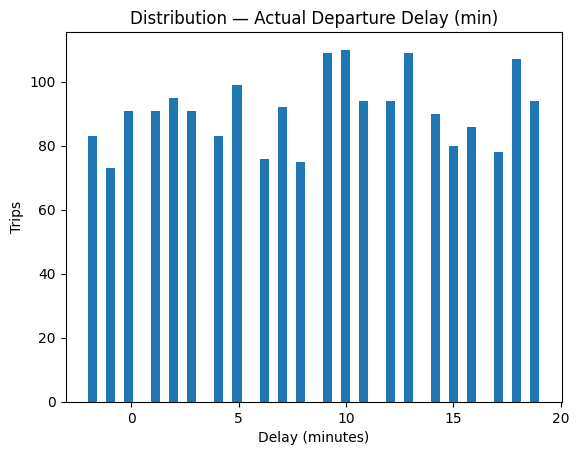

% trips with delay > 0 min: 87.65%
% trips with delay > 5 min: 64.70%
% trips with delay > 10 min: 41.60%
% trips with delay > 15 min: 18.25%


In [8]:
series = df["actual_departure_delay_min"].dropna()

plt.figure()
plt.hist(series, bins=50)
plt.title("Distribution — Actual Departure Delay (min)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Trips")
plt.show()

for th in [0,5,10,15]:
    pct = (series > th).mean()*100
    print(f"% trips with delay > {th} min: {pct:.2f}%")


Sebaran keterlambatan terutama di rentang 5–15 menit dengan puncak sekitar 9–13 menit, disertai sedikit nilai ≤0 menit (indikasi berangkat tepat/lebih awal) dan ekor kanan hingga ~19 menit untuk kasus terlambat berat; variabilitas yang lebar ini menandakan faktor konteks (jam sibuk, weekday/weekend) sangat berpengaruh.

### 2) Apakah bus lebih sering tepat waktu atau terlambat?

True     1499
False     501
<NA>        0
Name: delayed, dtype: Int64


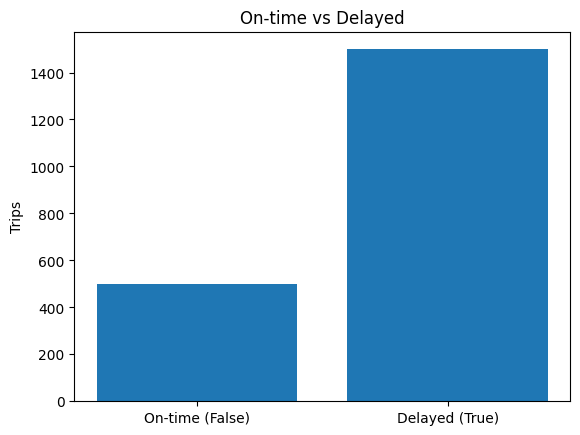

In [9]:
counts = df["delayed"].value_counts(dropna=False)
print(counts)

plt.figure()
plt.bar(["On-time (False)","Delayed (True)"], [
    counts.get(False,0), counts.get(True,0)
])
plt.title("On-time vs Delayed")
plt.ylabel("Trips")
plt.show()


Berdasarkan 2000 perjalanan yang dianalisa dalam dataset, keterlambatan terjadi pada 1499 perjalanan. Sekitar ~75% dari total perjalanan mengalami keterlambatan, angka ini sangat tinggi. 
Dampak keterlambatan ini seringnya bisa mengakibatkan over-capacity atau kepadatan pada transportasi umum lain, karena pengguna cenderung akan mengganti moda transportasi(tirto.id)

### 3) Pada jam berapa(dalam sehari) paling sering terjadi keterlambatan?

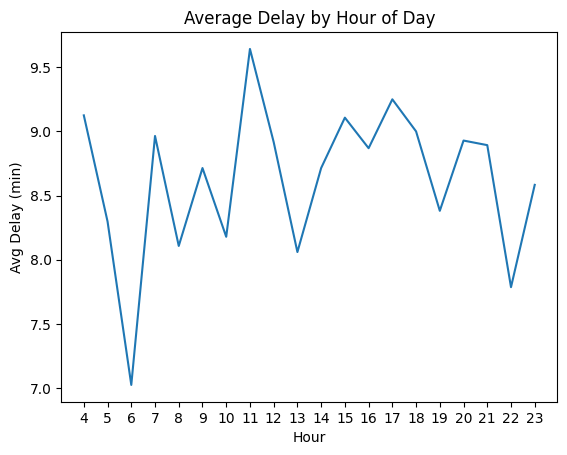

In [ ]:
# Rata-rata delay hanya untuk jam 4-23
grp_hour = (
    df.loc[df["hour"].between(4, 23)]
      .groupby("hour")["actual_departure_delay_min"]
      .mean()
      .reindex(range(4, 24))   # pastikan urut & lengkap 4..23 (akan NaN jika tak ada data)
)

plt.figure()
plt.plot(grp_hour.index, grp_hour.values)
plt.title("Average Delay by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Delay (min)")
plt.xticks(range(4, 24, 1))
plt.show()

Jumlah delayed trips per jam (04–23), diurutkan terbanyak:
hour
14    69
10    68
8     66
23    65
7     65
16    64
17    64
19    64
22    64
9     63
12    62
11    61
13    61
5     61
20    61
15    60
18    60
21    60
6     56
4     56
Name: trip_id, dtype: int64

TOP 5 jam dengan delayed terbanyak:
hour
14    69
10    68
8     66
23    65
7     65
Name: trip_id, dtype: int64


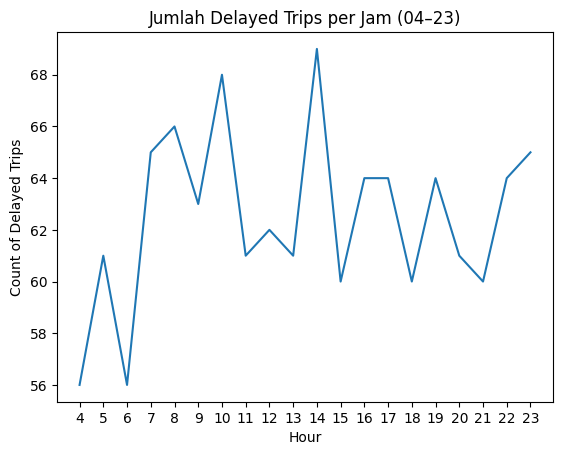

In [23]:

# Pastikan kolom hour ada (dari scheduled_departure_ts)
if "hour" not in df.columns:
    df["hour"] = df["scheduled_departure_ts"].dt.hour

# Definisikan "delayed" (prioritas pakai kolom 'delayed' kalau tersedia)
if "delayed" in df.columns:
    is_delayed = df["delayed"].fillna(False).astype(bool)
else:
    TH = 5  # ubah threshold bila perlu
    is_delayed = (df["actual_departure_delay_min"].fillna(0) > TH)

# Filter jam 4 s/d 23
mask_hour = df["hour"].between(4, 23)

# Hitung jumlah delayed trips per jam
counts = (
    df.loc[mask_hour & is_delayed]
      .groupby("hour")["trip_id"]   # bisa pakai any column; trip_id aman
      .count()
      .reindex(range(4, 24), fill_value=0)  # pastikan urutan 4..23
      .astype(int)
)

# Tampilkan ranking (terbanyak ke sedikit)
ranking = counts.sort_values(ascending=False)
print("Jumlah delayed trips per jam (04–23), diurutkan terbanyak:")
print(ranking)

# Opsional: ambil TOP-N jam dengan delayed terbanyak
TOP_N = 5
print(f"\nTOP {TOP_N} jam dengan delayed terbanyak:")
print(ranking.head(TOP_N))

# Plot batang
plt.figure()
plt.plot(counts.index, counts.values)
plt.title("Jumlah Delayed Trips per Jam (04–23)")
plt.xlabel("Hour")
plt.ylabel("Count of Delayed Trips")
plt.xticks(range(4, 24, 1))
plt.show()

Keterlambatan yang cukup tinggi kerap terjadi di jam 09.00-10.00 pagi dan jam 13.00-14.00 siang. Hal ini perlu diperhatikan karena berdasarkan data Ditlantas, 54% kemacetan di Jakarta terjadi pada jam sibuk, yakni pukul 06.00-10.00 dan 15.00-20.00(BBC,2022). Keterlambatan pada jam tersebut bisa sangat berdampak dan merugikan untuk pengguna transportasi umum khususnya kelas pekerja.

### 4) Pada hari apa saja (dalam seminggu) sering terjadi keterlambatan?

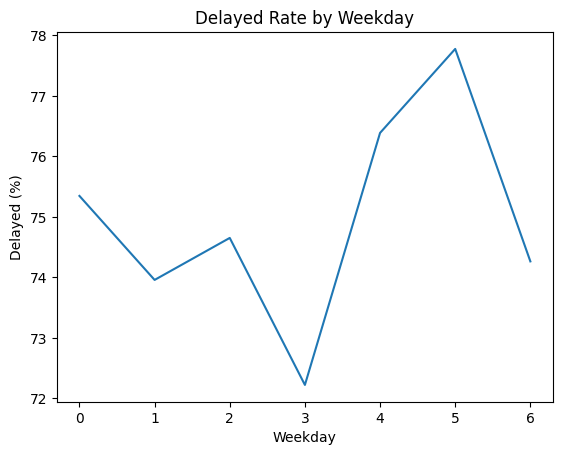

In [11]:
grp_wd = df.groupby("weekday")["delayed"].mean()
plt.figure()
plt.plot(grp_wd.index, (grp_wd.values*100))
plt.title("Delayed Rate by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Delayed (%)")
plt.show()


Menunjukkan pola U terbalik: keterlambatan terendah terjadi di hari ke-3 (Kamis, ~72%), lalu meningkat tajam menjelang akhir pekan dan mencapai puncak di hari ke-5 (Sabtu, ~77–78%), sebelum turun kembali pada Minggu. Ini menunjukkan kombinasi faktor akhir-pekan dengan adanya volume rekreasi, acara/kegiatan, dan perubahan pola perjalanan yang memperbesar peluang telat, sedangkan pertengahan minggu cenderung lebih stabil.